# Pymaceuticals Inc.
---

### Analysis

 This project analyzed multiple drug regimens given to mice with tumors. The population included 249 mice, with one mouse sample removed for accuracy due to duplicate data that could not be resolved, for a final total of 248 mice. There was a nearly equal split between male and female mice. 
 The two most effective drug treatments were Ramicane and Capomulin, respectively, according to the box plot created. They had the smallest median tumor growth and reduced the size of the tumors most significantly. Interestingly, the tumors continued to grow through the first two timepoints, and then showed a significant drop, followed by a leveling out and then another smaller reduction in tumor mass.
  Finally, we determined a strong positive correlation (0.71) between mouse weight and tumor volume when we analyzed the Capomulin group. This indicates that the larger the mass of the mouse, the larger the mass of the tumor they will develop. This leads me to believe a lower body mass would be helpful to minimize the size of tumors in humans, and increase the odds of successful treatment.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_mouse_study_df["Mouse ID"].nunique() 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study_df[combined_mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_combined_mouse_study_df = combined_mouse_study_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
# clean_combined_mouse_study_df = combined_mouse_study_df.drop_duplicates(keep=False)
combined_mouse_study_df.drop(combined_mouse_study_df.index[(combined_mouse_study_df["Mouse ID"] == "g989")],
axis = 0, inplace = True)

In [6]:
# Checking the number of mice in the clean DataFrame
# len(clean_combined_mouse_study_df
combined_mouse_study_df["Mouse ID"].nunique() 

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = combined_mouse_study_df.groupby(["Drug Regimen"])
# tumor_volume_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
average_tumor = tumor_volume["Tumor Volume (mm3)"].mean()
# average_tumor
median_tumor = tumor_volume["Tumor Volume (mm3)"].median()
# median_tumor
variance_tumor = tumor_volume["Tumor Volume (mm3)"].var()
# variance_tumor
sdev_tumor = tumor_volume["Tumor Volume (mm3)"].std()
# sdev_tumor
sem_tumor = tumor_volume["Tumor Volume (mm3)"].sem()
# sem_tumor
# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({"Mean Tumor Volume" : average_tumor,
                                 "Median Tumor Volume" : median_tumor,
                                 "Variance Tumor Volume" : variance_tumor,
                                 "SDEV Tumor Volume" : sdev_tumor,
                                 "SEM Tumor Volume" : sem_tumor})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SDEV Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_summary_agg = tumor_volume["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# tumor_summary_agg
#Clean up Series names
tumor_summary_agg = tumor_summary_agg.rename(columns = {"mean" : "Mean Tumor Volume",
                                                        "median" : "Median Tumor Volume",
                                                        "var" : "Variance Tumor Volume",
                                                        "std" : "SDEV Tumor Volume",
                                                        "sem" : "SEM Tumor Volume"})
tumor_summary_agg

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SDEV Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
combined_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


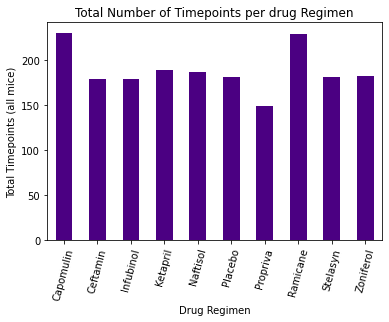

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_total = tumor_volume["Timepoint"].count()
# timepoints_total                                                    

timepoints_bar = timepoints_total.plot(kind = "bar", title = "Total Number of Timepoints per drug Regimen",
                                       rot = 75, color = "indigo")
timepoints_bar.set_xlabel("Drug Regimen")
timepoints_bar.set_ylabel("Total Timepoints (all mice)")
timepoints_bar
plt.savefig("../Images/bargraph1.png")

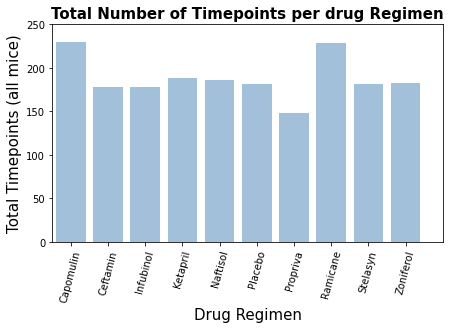

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Set x and y axes
x_axis = np.arange(len(timepoints_total))
y_axis = timepoints_total

#Set ticks
ticks = list(timepoints_total.index.values)
tick_locations = [value for value in x_axis]

#Size and format bar graph
plt.figure(figsize = (7,4))
plt.bar(x_axis, y_axis, color = "steelblue", alpha = 0.5, align = "center")
plt.xticks(tick_locations, ticks, rotation = "75")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

#Create labels and Tile
plt.title("Total Number of Timepoints per drug Regimen", fontsize=15, fontweight = "bold")
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("Total Timepoints (all mice)", fontsize = 15)
plt.savefig("../Images/bargraph2.png")

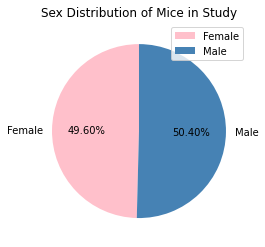

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Groupby Sex
mouse_sex = combined_mouse_study_df.groupby(["Sex"]).nunique()
# mouse_sex
#Create Pie Chart
mice_pie = mouse_sex.plot(kind = "pie", y = "Mouse ID", title = ("Sex Distribution of Mice in Study"),
                         startangle = 90, colors = ["pink", "steelblue"], autopct = "%.2f%%")
#Remove Y axis label
mice_pie.set_ylabel("")
plt.show()
plt.savefig("../Images/piegraph1.png")

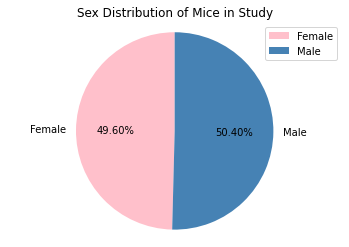

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# mice_sex = combined_mouse_study_df["Sex"].value_counts()
mice_sex = combined_mouse_study_df.groupby(["Sex"]).nunique()
# mice_sex

#Set colors and labels
colors = ["pink", "steelblue"]
labels = ["Female", "Male"]

# #Create Pie Chart
plt.pie(mice_sex["Mouse ID"], colors = colors, labels = labels, autopct = "%.2f%%", startangle = 90)

#Create title and legends
plt.title("Sex Distribution of Mice in Study")
plt.legend(labels, loc = "upper right")
plt.axis("equal")
plt.show()
plt.savefig("../Images/piegraph2.png")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_mouse_study_df.groupby(["Mouse ID"])["Timepoint"].max()
# last_timepoint

In [15]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint, combined_mouse_study_df, on = (["Mouse ID", "Timepoint"]))
# final_tumor_volume_df

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes(Had to move this for next cell to work)
for treatment in treatments:
    regimen = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment]
    tumor_vol = regimen["Tumor Volume (mm3)"]

#Append tumor_vol to tumor_vol_data    
    tumor_vol_data.append(tumor_vol)

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    

In [18]:
# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

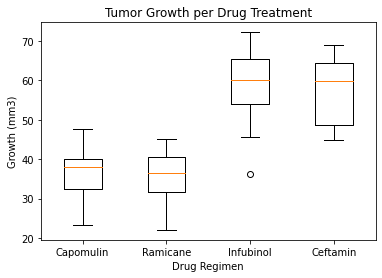

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Growth per Drug Treatment")
ax1.set_ylabel("Growth (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, labels = treatments)
plt.show()
plt.savefig("../Images/boxplot.png")

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#choose mouse u364
u364 = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] == "u364"]
# u364

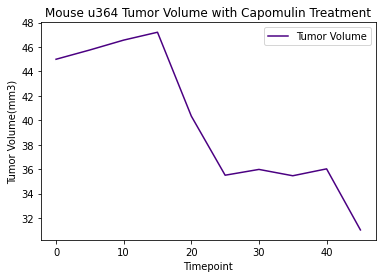

In [21]:
#Create x and y variables
y_tumor = u364["Tumor Volume (mm3)"]
x_timepoint = u364["Timepoint"]

#Create Lineplot
plt.plot(x_timepoint, y_tumor, label = "Tumor Volume", color = "indigo")
plt.legend(loc = "best")

#Add titles and labels
plt.title("Mouse u364 Tumor Volume with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")

plt.show()

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Create variable to store all Capomulin mice
capomulin_mice = combined_mouse_study_df.loc[combined_mouse_study_df["Drug Regimen"] == "Capomulin"]
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


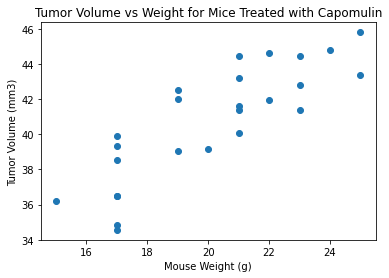

<Figure size 432x288 with 0 Axes>

In [26]:
#Create variables
capomulin_mice_group = capomulin_mice.groupby(["Mouse ID"]).mean()
x_avg_mouse_weight = capomulin_mice_group["Weight (g)"]
y_avg_tumor_vol_cap = capomulin_mice_group["Tumor Volume (mm3)"]


#Graph scatterplot
plt.scatter(x_avg_mouse_weight, y_avg_tumor_vol_cap)
            
#Add Titles and labels
plt.title("Tumor Volume vs Weight for Mice Treated with Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
plt.savefig("../Images/scatterplot1.png")

## Correlation and Regression

The r-squared value is: 0.7088568047708717


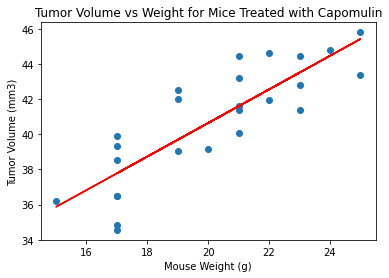

<Figure size 432x288 with 0 Axes>

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Copy scatterplot axes from above
x_avg_mouse_weight = capomulin_mice_group["Weight (g)"]
y_avg_tumor_vol_cap = capomulin_mice_group["Tumor Volume (mm3)"]

#Add code for regression (from module 3 homework)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avg_mouse_weight, y_avg_tumor_vol_cap)
regress_values = x_avg_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graph scatterplot
plt.scatter(x_avg_mouse_weight, y_avg_tumor_vol_cap)

#Create plotline
plt.plot(x_avg_mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#Add Titles and labels (also from above)
plt.title("Tumor Volume vs Weight for Mice Treated with Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared value is: {rvalue**2}")
plt.show()
plt.savefig("../Images/scatterplot2.png")